
# Project: Investigate a Dataset - [TMDb-Movies Dataset ]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This data set contains information more than 10,000 movies collected from The Movie Database (TMDb). it contains the following columns:
   1. id  
   2. imdb_id 
   3. popularity 
   4. budget 
   5. revenue 
   6. original_title 
   7. cast 
   8. homepage 
   9. director 
   10. tagline 
   11. keywords 
   12. overview 
   13. runtime  
   14. genres 
   15. production_companies 
   16. release_date 
   17. vote_count 
   18. vote_average 
   19. release_year 
   20. budget_adj 
   21. revenue_adj 

Certain columns, like ‘cast’,'production_companies' and ‘genres’, contain multiple values separated by pipe (|) characters.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.



### Question(s) for Analysis
> 1. Does the quality level affect the average quality rating of a movie?
> 2. Does the director of a movie affect the quality of the movie produced?
> 3. Does the quality level of a movie affect the profit earned?
> 4. What is the correlation between revenue and profit earned?
> 5. What is the correlation between runtime and profit? 
> 6. Does the production company affect the quality of movie produced?

In [1]:
# import all the necessary libraries for analysing, manipulating and visualising the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> In this section, we are going to check on the structure of the dataset as shown below:
 1. Load the data to be able to access it.
 2. Use the head function to access the top 5 rows in order to see if the dataframe loaded is in the correct format.
 3. Analyse the shape of the dataframe to know how many entries and features it has.
 4. Getting the summary of the dataframe eg datatypes and columns with null values.
 5. Getting the summary statistic of the dataframe using describe function.
 6. Assessing how many null values are in each column.
 7. Check for any duplicated rows.

In [2]:
#Load the dataset and access the top rows
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#Assess the number of entries and features.
df.shape

(10866, 21)

In [4]:
#Getting the summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
#getting the statistic summary of the dataframe
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
#Checking for null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
#Checking for duplicates
df.duplicated().sum()

1


### Data Cleaning (Checking for duplicates and droping null values and irrelevant columns)
> In the data cleaning stage, we perform the following activities:
 1. Drop all rows that contain null values.
 2. Change the datatype of the release_date column to datetime.
 3. Drop all the unnecessary columns
 4. Check the structure of the dataframe after dropping rows and columns.

In [8]:
#Dropping null values
df.dropna(inplace=True)

In [9]:
#Change the datatype
df['release_date'] = pd.to_datetime(df['release_date'])

In [10]:
# Dropping columns
df.drop(columns=['id','imdb_id','popularity','homepage','tagline','keywords','overview','vote_count','budget_adj','revenue_adj'],axis=1,inplace=True)

In [11]:
#analysing the number of rows and columns after dropping some of them
df.shape

(1992, 11)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 Does the director of a movie affect the quality of movie?

 1. Create a new column that groups the vote_average column into levels.
 2. Grouping directors with the quality of movies they make.

#### Creating a new column for the quality of movies using the vote_average column. And determining what level of movie_quality get the highest average rating.


  1. Create the new column.
  2. Get the average vote for each  movie quality level to see which category has the highest vote_average.
  3. Plot a barchart to show quality ratings of each quality level.

In [12]:
#Feature engineering
bin_edges = [1.5,5.4,6.0,6.6,9.2]
bin_names = ['Very Low','Low','Moderately High','Very High']
df['movie_quality'] = pd.cut(df['vote_average'],bin_edges,labels= bin_names)

In [13]:
#Filtering the dataframe using groupby
mean_qualitym = df.groupby('movie_quality').vote_average.mean()

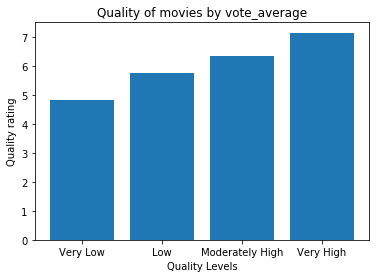

In [14]:
# Plotting a barchart
location = [1,2,3,4]
heights = mean_qualitym
labels = ['Very Low','Low','Moderately High','Very High']
plt.bar(location,heights,tick_label = labels)
plt.title('Quality of movies by vote_average')
plt.xlabel('Quality Levels')
plt.ylabel('Quality rating');

#### Grouping directors with the quality of movies they make
> This will tell us the quality of the movies each director made and the number of movies at each quality level

In [15]:
#Filtering using groupby
director_moviequality = df.groupby(['director'])['movie_quality'].value_counts()
director_moviequality

director                                                                                          movie_quality  
Abe Sylvia                                                                                        Moderately High    1
Adam Brooks                                                                                       Moderately High    1
Adam Elliot                                                                                       Very High          1
Adam Green                                                                                        Low                1
                                                                                                  Very Low           1
Adam MacDonald                                                                                    Low                1
Adam McKay                                                                                        Moderately High    2
                                                     

#### Which directors made movies of the best quality and number of high quality movies they made
 1. Filtering the director column by movie quality of the best quality and counting how many movies of the best quality each director has. Then, select the top 10 directors with the most number of Very High quality movies.
 2. Plot a barchart to show the top 10 directors and the number of Very High quality movies they have.
 3. Plot a pie chart to show the top 10 directors.

In [16]:
#Using the query function to filter the director column.
top_directors = df.query('movie_quality == "Very High"')['director'].value_counts().head(10)

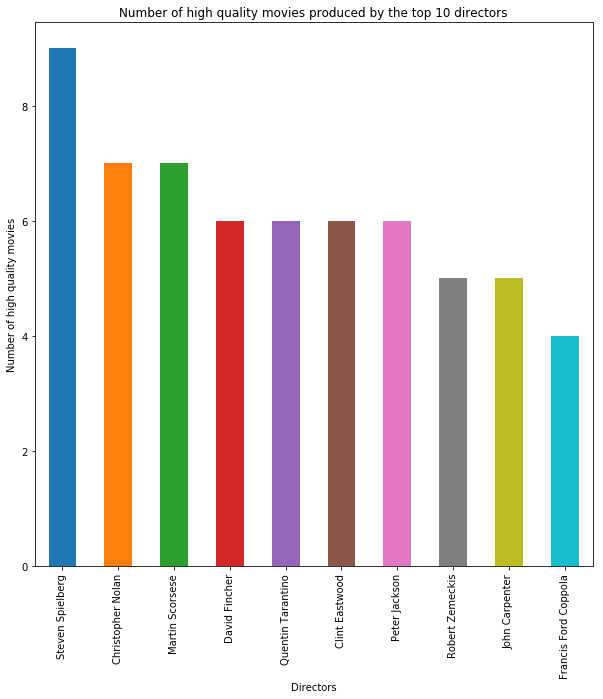

In [17]:
top_directors.plot(kind='bar',figsize = (10,10))
plt.title('Number of high quality movies produced by the top 10 directors')
plt.xlabel('Directors')
plt.ylabel('Number of high quality movies');

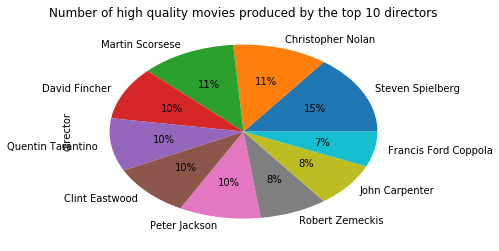

In [18]:
top_directors.plot(kind='pie',autopct='%1.0f%%')
plt.title('Number of high quality movies produced by the top 10 directors');

#### Is the profit earned affected by the quality of the movie?
 1. Create a new column called profit.
 2. Filter the profit column by grouping it by the movie quality and the quality means.
 3. Show a bar chart to relationship between the levels of movie quality and their average profits. 
 4. Assessing the relationship between the profit earned and the revenue.

In [19]:
#Feature Engineering
#Creating a new profit column in the dataframe
df['profit'] = df['revenue'] - df['budget']
df['profit']

0        1363528810
1         228436354
2         185238201
3        1868178225
4        1316249360
5         397950503
6         285603537
7         487380321
8        1082730962
9         678708609
10        635674609
11          7987720
12         21869414
13        155637091
14       1125035767
15        111760117
16        277771424
17        388602163
19        490523427
20         19035668
22        360490832
23        529651467
24        105346506
25        532330139
27        322802136
28         68346473
29        250256926
30         29355203
31         53069268
34         92170815
            ...    
9992            170
10012             0
10078     -23000000
10094     458684675
10131       1000000
10190       -150000
10213             0
10222     299265768
10223     857100000
10224     102055768
10238             0
10251      23898845
10255      -6604769
10317     -16726405
10328             0
10338      13515786
10372       -125000
10401     102084787
10438      76398765


In [20]:
#Finding out if the quality of movies affects the profit made
ratings_profit = df.groupby('movie_quality')['profit'].mean().astype(int)

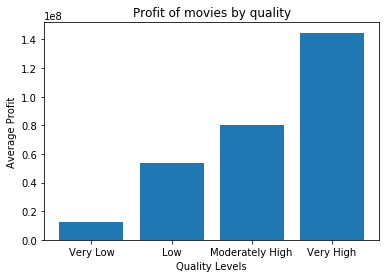

In [21]:
#creating a barchart for Quality average rating for each level of quality
location = [1,2,3,4]
heights = ratings_profit
labels = ['Very Low','Low','Moderately High','Very High']
plt.bar(location,heights,tick_label = labels)
plt.title('Profit of movies by quality')
plt.xlabel('Quality Levels')
plt.ylabel('Average Profit');

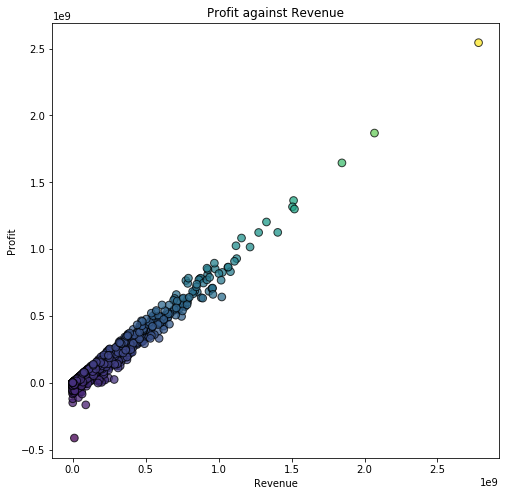

In [22]:
#Creating a scatter plot
plt.figure(figsize=(8,8))
plt.scatter(df['revenue'],df['profit'],s=59,c=df['profit'],edgecolor='black',alpha=0.75)
plt.xlabel('Revenue')
plt.ylabel('Profit')
plt.title('Profit against Revenue')
plt.show();

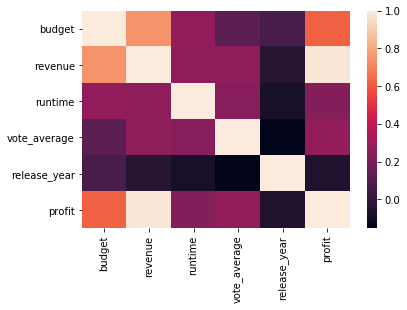

In [23]:
sns.heatmap(df.corr());

In [24]:
df['revenue'].corr(df['profit'])

0.98342866730538314

### Research Question 2  Does the production company affect the quality of the movie produced?
 1. Create a function that can be used to split cast,genres and production companies columns.
 2. Filter the production companies column by Very High quality movies then selecting the production companies that have the most numbers of great quality movies.

In [25]:
def production_comp(x):
    #concatenate all the rows
    data_plot = df[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    #counts each of the values and plots a graph.
    plot = data.value_counts().head(10).plot(kind = 'bar')
    
    return plot



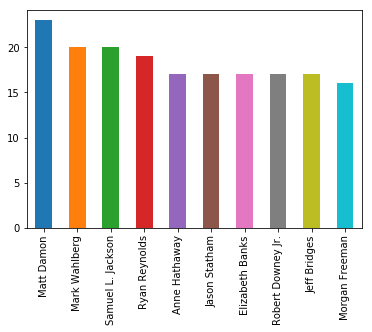

In [26]:
production_comp('cast')

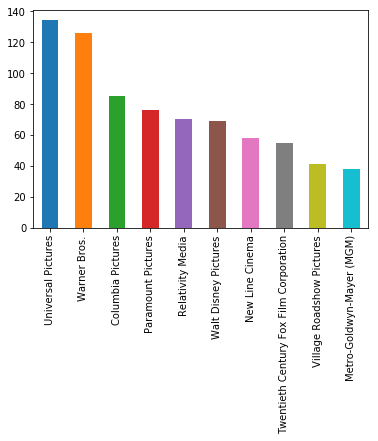

In [27]:
production_comp('production_companies')

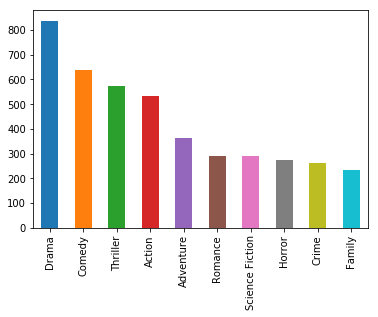

In [28]:
production_comp('genres')

In [29]:
#Use query to filter out production companies
quality_companies = df.query('movie_quality == "Very High"')['production_companies']
comp_list = quality_companies.str.cat(sep='|')
pd.Series(comp_list.split('|')).value_counts().head(10)

Warner Bros.                              56
Universal Pictures                        35
Paramount Pictures                        25
Walt Disney Pictures                      25
Twentieth Century Fox Film Corporation    19
Columbia Pictures                         19
New Line Cinema                           15
DC Comics                                 14
Miramax Films                             14
Pixar Animation Studios                   13
dtype: int64

### Research Question 3 Does the runtime affect profit made by movie
 1. Draw a scatter plot to show distribution of the plots.
 2. Use the correlation function to show the value of the correlation between profit and runtime.

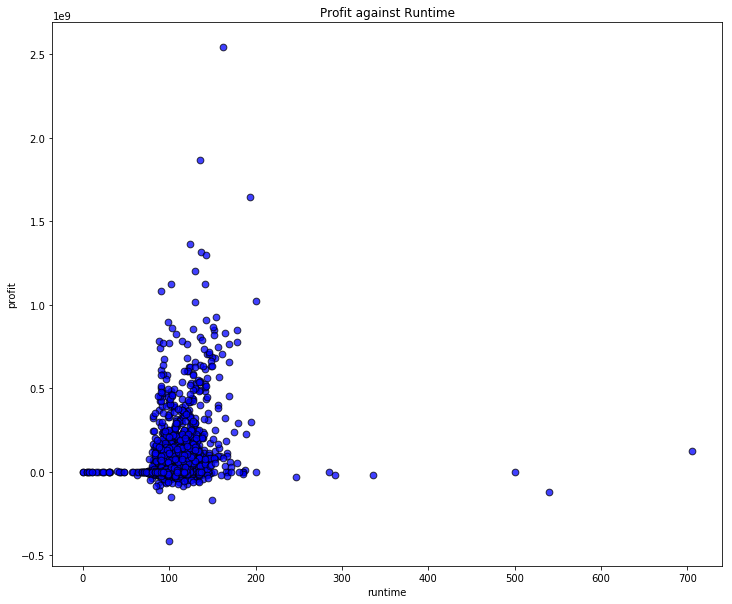

In [30]:
plt.figure(figsize=(12,10))
plt.scatter(df['runtime'],df['profit'],s= 45,c='blue',edgecolor='black',alpha=0.75)
plt.xlabel('runtime')
plt.ylabel('profit')
plt.title('Profit against Runtime')
plt.show();

In [31]:
df['runtime'].corr(df['profit'])

0.23251440322406505

<a id='conclusions'></a>
### Conclusions

  1. Steven Spielberg, Christopher Nolan, Martin Scorsese are the best directors.
  2. Movies with the best quality give back the most profit.
  3. Profit and revenue have a strong correlation.
  4. Universal pictures, Warner Bros and Colombia Pictures are the most used in movie production.
  5. The most produced movie genres are Drama, Comedy and Thriller.
  6. Warner Bros. produces the best rated movies.
  7. Runtime does not affect the profit earned from a movie.
 
 ### Limitations
 > The dataset contained a lot of null value that when dropped led to a very small amount of data to be available for analysis.

In [32]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0